In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('autos.csv',encoding='latin_1')

In [2]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# Converting all German values to English

In [3]:
df['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [4]:
df['seller'].replace({'privat':'private',
                      'gewerblich':'commercial'},
                     inplace = True)
df['seller'].head()

0    private
1    private
2    private
3    private
4    private
Name: seller, dtype: object

In [5]:
df['offerType'].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [6]:
df['offerType'].replace({'Angebot':'offer',
                      'Gesuch':'application'},
                     inplace = True)
df['offerType'].head()

0    offer
1    offer
2    offer
3    offer
4    offer
Name: offerType, dtype: object

In [7]:
df['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [8]:
df['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [9]:
df['vehicleType'].replace({'kleinwagen':'small car',
                      'kombi':'microbus',
                      'cabrio':'convertible',
                      'andere' : 'other'},
                     inplace = True)
df['vehicleType'].head()

0          NaN
1        coupe
2          suv
3    small car
4    small car
Name: vehicleType, dtype: object

In [10]:
df['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [11]:
df['gearbox'].replace({'manuell':'manual',
                      'automatik':'automatic'},
                     inplace = True)
df['gearbox'].head()

0       manual
1       manual
2    automatic
3       manual
4       manual
Name: gearbox, dtype: object

In [12]:
orig_list = list(df['model'].value_counts().index)
converted_list = ['golf','other','3s','polo','corsa','astra','passat','a4','cclass','5s','eclass','a3','a6','focus','fiesta','transporter','twingo','2series','fortwo','aclass','vectra','1s','mondeo','clio','touran','3series','punto','zafira','megane','ibiza','ka','lupo','xseries','octavia','cooper','fabia','clk','micra','caddy','80','sharan','scenic','omega','slk','leon','laguna','civic','tt','1stseries','6series','iseries','galaxy','mclass','7s','meriva','yaris','great','mxseries','a5','kangoo','911','bclass','500','tiguan','vito','escort','one','arosa','zseries','bora','colt','beetle','berlingo','sprinter','tigra','v40','transit','touareg','fox','swift','insignia','c_max','corolla','panda','seicento','sl','v70','4series','scirocco','156','a1','primera','espace','grand','stilo','almera','a8','147','avensis','qashqai','eos','c3','c5','signum','Beetle','s_max','5series','q5','c4','matiz','ducato','agila','aygo','viano','getz','601','combo','100','carisma','cayenne','boxster','alhambra','cordoba','c2','superb','c1','kuga','forfour','rio','jetta','cuore','a2','altea','cadet','rav','picanto','sorento','mseries','accord','crseries','up','q7','vivaro','toledo','voyager','xcseries','Bravo','santa','doblo','logan','mode','verso','ptcruiser','cl','sportage','jazz','fusion','sandero','mustang','roomster','carnival','6s','ceed','gallant','v50','q3','tucson','lancer','auris','impreza','phaeton','freelander','glk','calibra','pajero','x_trail','850','159','jimny','ypsilon','spider','duster','clubman','yeti','cseries','cc','roadster','cherokee','x_type','gclass','captiva','vclass','wrangler','legacy','s60','300c','rxseries','defender','justy','sirion','forester','outlander','grade','niva','s_type','spark','r19','navara','cxseries','aveo','900','antara','90','juke','discovery','exeo','range_rover_sport','kalos','range_rover','citigo','lanos','mii','crossfire','range_rover_evoque','gl','nubira','move','lybra','145','v60','croma','amarok','delta','terios','lodgy','9000','charade','b_max','musa','materia','200','kappa','samara','elefantino','i3','kalina','serie_2','rangerover','serie_3','serie_1','discovery_sport']

In [13]:
df['model'].replace(dict(zip(orig_list,converted_list)),inplace = True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [14]:
df['monthOfRegistration'].value_counts()

0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: monthOfRegistration, dtype: int64

In [15]:
df['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [16]:
df['fuelType'].replace({'benzin':'petrol',
                      'andere':'other',
                      'elektro':'electric'},
                     inplace = True)
df['fuelType'].head()

0    petrol
1    diesel
2    diesel
3    petrol
4    diesel
Name: fuelType, dtype: object

In [17]:
df['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [18]:
df['notRepairedDamage'].value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [19]:
df['notRepairedDamage'].replace({'nein':'No',
                      'ja':'Yes'},
                     inplace = True)
df['notRepairedDamage'].head()

0    NaN
1    Yes
2    NaN
3     No
4     No
Name: notRepairedDamage, dtype: object

In [20]:
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


# Exploring the dataset

In [21]:
df.shape

(371528, 20)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [23]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null datetime64[ns]
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSe

In [25]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,Yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No,2016-03-31,0,60437,2016-04-06 10:17:21


In [26]:
def get_missing_val_count_df(df):
  missing_count_list = []
  for col in df.columns:
    missing_count_list.append(df[col].isnull().sum())
  missing_count_df = pd.DataFrame(missing_count_list,columns=['count'],index = df.columns)
  return missing_count_df.sort_values('count',ascending=False)
get_missing_val_count_df(df)

,count
notRepairedDamage,72060
vehicleType,37869
fuelType,33386
model,20484
gearbox,20209
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


## Price

In [27]:
df['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

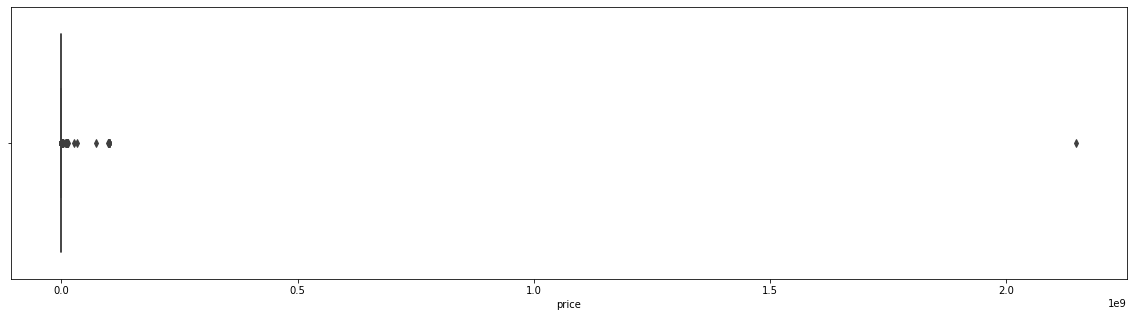

In [28]:
plt.figure(figsize = (20,5))
sns.boxplot(df['price'])

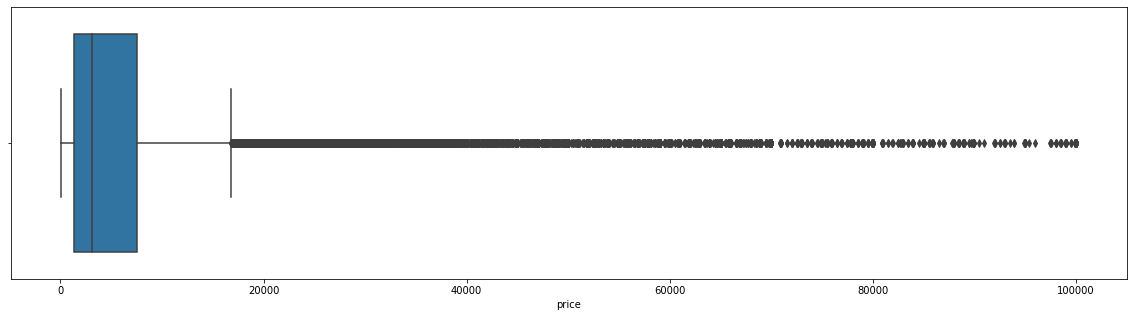

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

### Outlier detection using Isolation Forest

In [30]:
dfprice = df[(df['price'].isnull() == False)]['price']

[[0.00000000e+00]
 [5.78015500e+03]
 [1.15603100e+04]
 ...
 [2.14747209e+09]
 [2.14747787e+09]
 [2.14748365e+09]]


Text(0.5, 1.0, 'price')

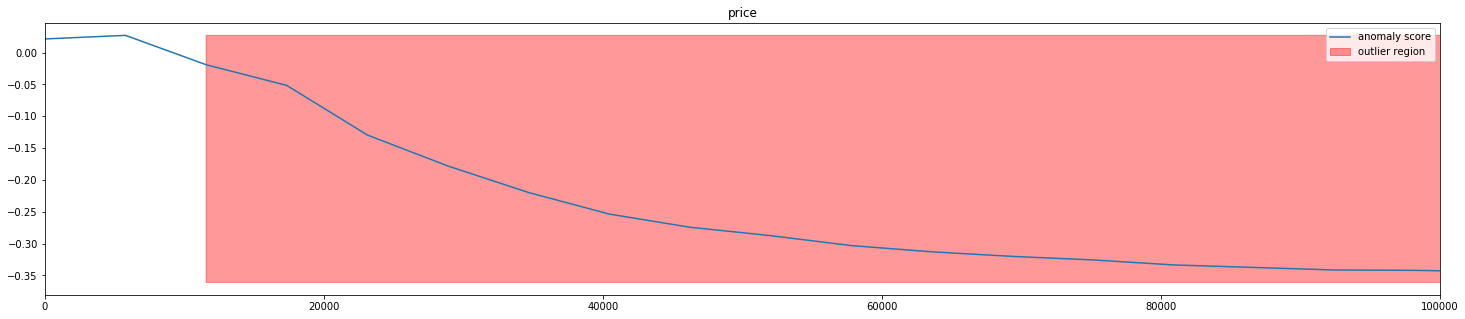

In [31]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(dfprice.values.reshape(-1,1))

xx = np.linspace(dfprice.min(), dfprice.max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(0, 100000)
# plt.axis([0,100000,0,0])
plt.title('price')

If we see from the above plot, almost all data point above 12000 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 100000 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with price below 100 also seem to be very low as far as price of a used car is concerned, so we will also drop those data points which have price below 100.

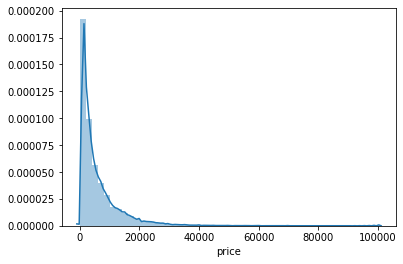

In [32]:
sns.distplot(df[(df['price']>=100) & (df['price']<=100000)]['price'])

In [33]:
df[(df['price']>=100) & (df['price']<=100000)].shape

(357805, 20)

In [34]:
df2 = df[(df['price']>=100) & (df['price']<=100000)]

### Checking for Missing Values

In [35]:
get_missing_val_count_df(df2)

,count
notRepairedDamage,65197
vehicleType,32947
fuelType,28773
model,17703
gearbox,16621
kilometer,0
postalCode,0
nrOfPictures,0
dateCreated,0
brand,0


No missing values for price feature.

### Statistical Analysis
Check for Normality - Shapiro Test

H0 : Price is normally distributed

In [36]:
from scipy.stats import shapiro
shapiro(df2['price'])

(0.6681488752365112, 0.0)

As we can see the pvalue is less than 0.05. So we can reject the null hypothesis that price is normally distributed.
We will use log transformation for converting price to normal distribution after we are done with any imputation in our dataset.

## Kilometers
Number of kilometers car has driven

In [37]:
df2['kilometer'].describe()

count    357805.000000
mean     125871.606042
std       39527.680682
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [38]:
df2['kilometer'].value_counts()

150000    231509
125000     37222
100000     15349
90000      12319
80000      10859
70000       9635
60000       8563
50000       7505
40000       6295
30000       5890
20000       5452
5000        5406
10000       1801
Name: kilometer, dtype: int64

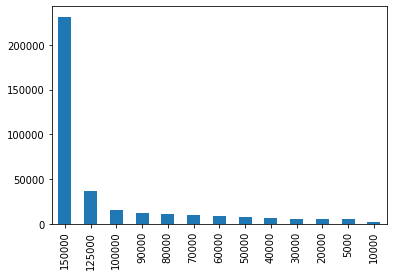

In [39]:
df2['kilometer'].value_counts().plot(kind = 'bar')

Seems like the website had certain options from which a user could select the number of kilometers the car has been driven instead of providing a place to put in an exact number. We could use this as a categorical variable instead of continous variable.

### Statistical Analysis
Is there any discrepancy in avg price with respect to Kilometers.

H0 : avg_price_5000_km = avg_price_10000_km = avg_price_20000_km = avg_price_30000_km = ..... = avg_price_150000_km

H1 : avg_price_5000_km != avg_price_10000_km != avg_price_20000_km != avg_price_30000_km != ..... != avg_price_150000_km

In [40]:
from scipy.stats import f_oneway
def oneway_posthoc(i):
    cat = {}
    for j in range(df2[i].nunique()):
        if pd.isna(df2[i].unique()[j]) == False:
            cat[df2[i].unique()[j]] = df2[df2[i] == df2[i].unique()[j]]['price']
    tstat,pval = f_oneway(*list(cat.values()))
    print(f'pvalue for {i} is {pval}')
    print()
    for k in cat:
        print(f'Avg price of car for {i} = {k} is ',cat[k].mean())

In [41]:
oneway_posthoc('kilometer')

pvalue for kilometer is 0.0

Avg price of car for kilometer = 150000 is  3766.229239468012
Avg price of car for kilometer = 125000 is  6233.0077910912905
Avg price of car for kilometer = 90000 is  8530.984820196445
Avg price of car for kilometer = 30000 is  15513.761460101867
Avg price of car for kilometer = 70000 is  10783.866424494032
Avg price of car for kilometer = 5000 is  7055.269330373659
Avg price of car for kilometer = 100000 is  7712.39220796143
Avg price of car for kilometer = 60000 is  11755.809879715052
Avg price of car for kilometer = 20000 is  16269.871423330887
Avg price of car for kilometer = 80000 is  9449.329404180864
Avg price of car for kilometer = 50000 is  13182.09926715523
Avg price of car for kilometer = 40000 is  14822.27561556791
Avg price of car for kilometer = 10000 is  20042.599111604664


We can see from the oneway test that the price of used car is affected by kilometers as the pvalue is less than 0.05

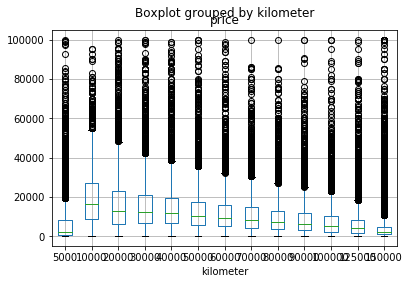

In [42]:
df2.boxplot(column='price',by = 'kilometer')

As we can see quite evidently that the average price of a used car starts decreasing as the number of kilometers it has run increases.

### NotRepairedDamaged 
If the car has a damage which is not repaired yet

In [43]:
df2['notRepairedDamage'].describe()

count     292608
unique         2
top           No
freq      258897
Name: notRepairedDamage, dtype: object

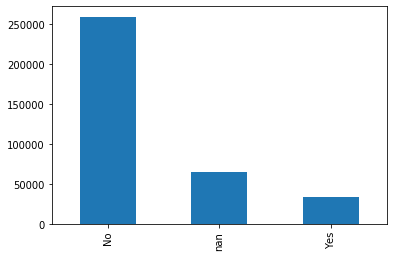

In [44]:
df2['notRepairedDamage'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for notRepairedDamaged does not really make sense because we will not be able to determine whether the car was damaged or not by using other features in the dataset. So we will drop the NA values.

In [45]:
df2 = df2[df2['notRepairedDamage'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to notRepairedDamage.

H0 : avg_price_notRepaired = avg_price_Repaired

H1 : avg_price_notRepaired != avg_price_Repaired

In [46]:
price_repaired = df2.loc[df2['notRepairedDamage'] == 'No','price']
price_notRepaired = df2.loc[df2['notRepairedDamage'] == 'Yes','price']

Shapiro Test - Test for Normality

In [47]:
print(shapiro(price_repaired))
print(shapiro(price_notRepaired))

(0.7012584805488586, 0.0)
(0.49935317039489746, 0.0)


The prices for both repaired and not repaired cars is not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [48]:
from scipy.stats import bartlett
print(bartlett(price_repaired,price_notRepaired))

BartlettResult(statistic=24690.66594067853, pvalue=0.0)


The variance in price for repaired car is not equal to that in a not repaired car as pvallue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of repaired car is equal to average price of not repaired car.

In [49]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_repaired,price_notRepaired))

MannwhitneyuResult(statistic=1881704876.5, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its repaired or not as the pvalue is less than 0.05

Post hoc analysis

In [50]:
print('Avg price for car which has been repaired : ',price_repaired.mean())
print('Avg price for car which has not been repaired : ',price_notRepaired.mean())

Avg price for car which has been repaired :  6925.99075694195
Avg price for car which has not been repaired :  2250.0218326362315


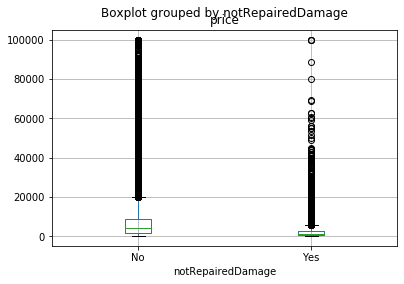

In [51]:
df2.boxplot(column='price',by = 'notRepairedDamage')

As we can see quite evidently that the average price of a used car which has been repaired is higher that that which has not been repaired.

### VehicleType

In [52]:
df2['vehicleType'].describe()

count        276862
unique            8
top       limousine
freq          80413
Name: vehicleType, dtype: object

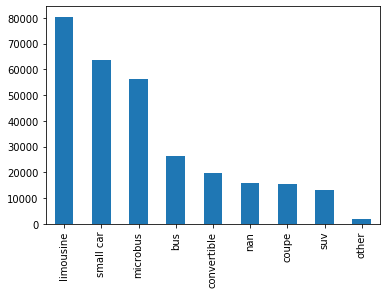

In [53]:
df2['vehicleType'].value_counts(dropna = False).plot(kind = 'bar')

We can impute the values of vehicleType depending on model,brand and price of the car.

### Statistical Analysis
Is there any discrepancy in avg price with respect to vehicleType.

H0 : avg_price_limousine = avg_price_small_car = avg_price_microbus = ..... = avg_price_other

H1 : avg_price_limousine != avg_price_small_car != avg_price_microbus != ..... != avg_price_other

In [54]:
oneway_posthoc('vehicleType')

pvalue for vehicleType is 0.0

Avg price of car for vehicleType = coupe is  11298.496694267924
Avg price of car for vehicleType = small car is  3071.054518579089
Avg price of car for vehicleType = limousine is  6350.043052740229
Avg price of car for vehicleType = convertible is  10689.742659671072
Avg price of car for vehicleType = microbus is  6259.362793594306
Avg price of car for vehicleType = suv is  13637.686801756683
Avg price of car for vehicleType = bus is  7007.458628841608


We can see from the oneway test that the price of used car is affected by vehcleType as the pvalue is less than 0.05

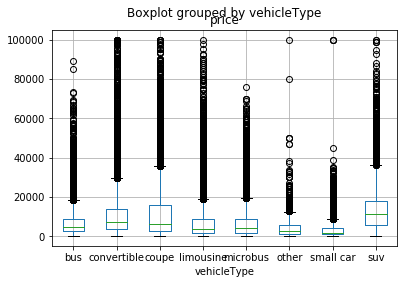

In [55]:
df2.boxplot(column='price',by = 'vehicleType')

As we can see quite evidently that the average price of a used car varies significantly for different type of vehicles.

### FuelType

In [56]:
df2['fuelType'].describe()

count     277281
unique         7
top       petrol
freq      180463
Name: fuelType, dtype: object

petrol      180463
diesel       91574
NaN          15327
lpg           4311
cng            504
hybrid         250
other           94
electric        85
Name: fuelType, dtype: int64


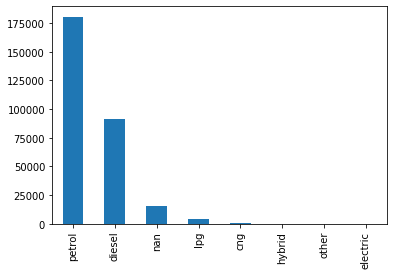

In [57]:
print(df2['fuelType'].value_counts(dropna = False))
df2['fuelType'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for fuelType does not really make sense because we will not be able to determine what type of fuelType the car belongs to by using other features in the dataset. So we will drop the NA values.

In [58]:
df2 = df2[df2['fuelType'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to fuelType.

H0 : avg_price_petrol_car = avg_price_diesel_car = avg_price_lpg_car = ..... = avg_price_other_fuelType

H1 : avg_price_petrol_car != avg_price_diesel_car != avg_price_lpg_car != ..... != avg_price_other_fuelType

In [59]:
oneway_posthoc('fuelType')

pvalue for fuelType is 0.0

Avg price of car for fuelType = diesel is  9086.161334003102
Avg price of car for fuelType = petrol is  5279.193408067028
Avg price of car for fuelType = lpg is  4670.095105543957
Avg price of car for fuelType = other is  5353.063829787234
Avg price of car for fuelType = hybrid is  13597.392
Avg price of car for fuelType = cng is  4991.855158730159
Avg price of car for fuelType = electric is  12957.552941176471


We can see from the oneway test that the price of used car is affected by fuelType as the pvalue is less than 0.05

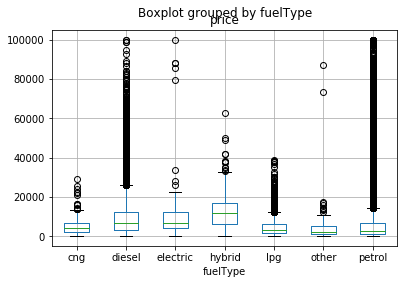

In [60]:
df2.boxplot(column='price',by = 'fuelType')

As we can see quite evidently that the average price of a used car varies significantly for different fueltypes of vehicles.

### Model

In [61]:
df2['model'].describe()

count     269435
unique       250
top         golf
freq       22025
Name: model, dtype: object

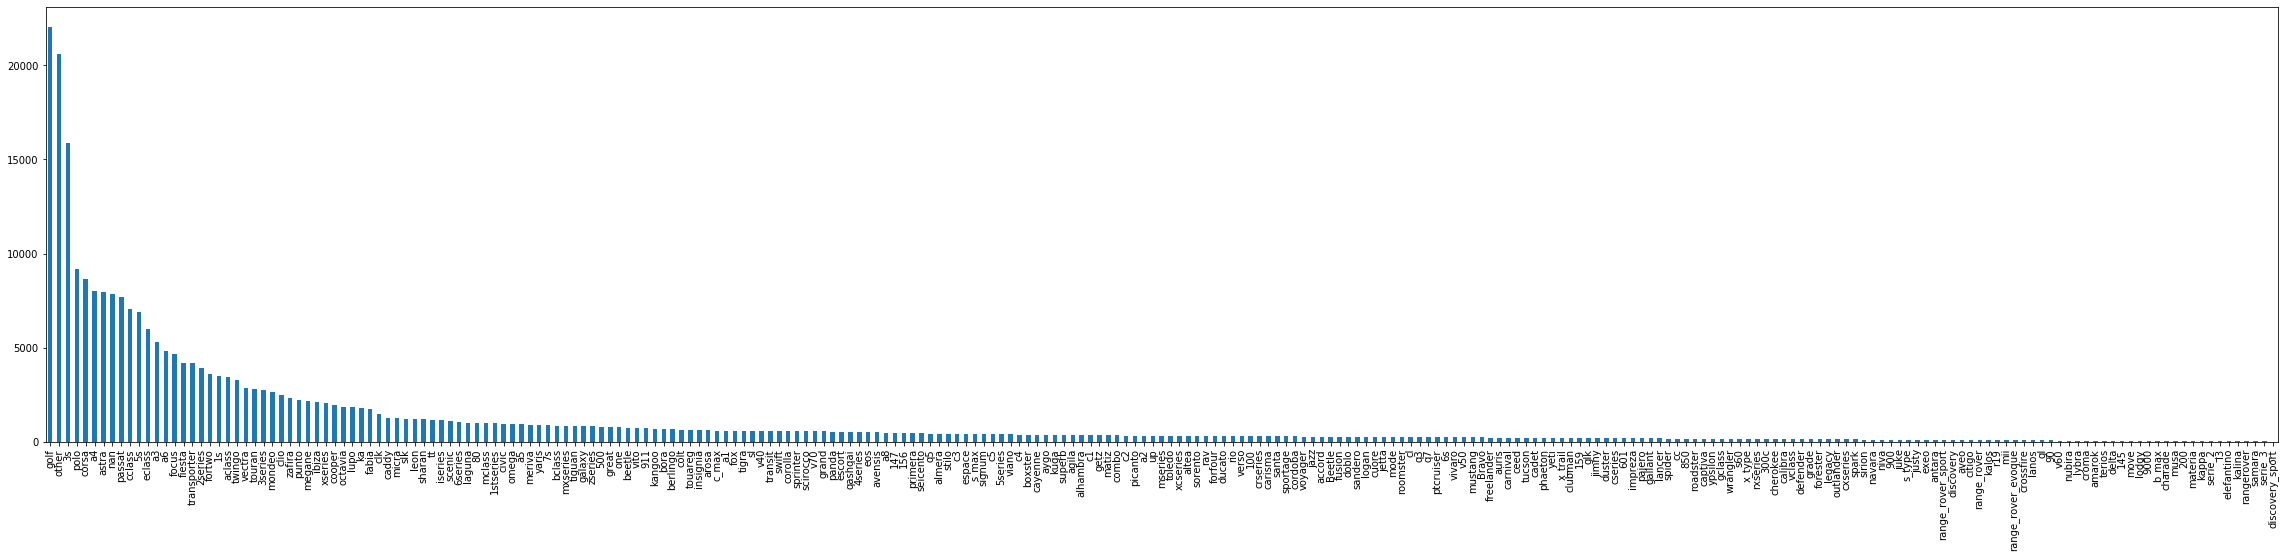

In [62]:
plt.figure(figsize=(40,8))
df2['model'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for model does not really make sense because we will not be able to determine what type of model the car belongs to by using other features in the dataset. So we will drop the NA values.

In [63]:
df2 = df2[df2['model'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to model.

H0 : avg_price_golf = avg_price_3s = avg_price_polo = ..... = avg_price_discovery_sport

H1 : avg_price_golf != avg_price_3s != avg_price_polo != ..... != avg_price_discovery_sport

In [64]:
oneway_posthoc('model')

pvalue for model is 0.0

Avg price of car for model = golf is  5553.614982973893
Avg price of car for model = fabia is  4409.561997703789
Avg price of car for model = 3s is  6543.775203072854
Avg price of car for model = 2series is  3426.5606214977074
Avg price of car for model = 3series is  3655.3863885839737
Avg price of car for model = passat is  5525.272018706158
Avg price of car for model = navara is  13893.712871287129
Avg price of car for model = twingo is  1658.012534393152
Avg price of car for model = c_max is  6575.927586206896
Avg price of car for model = aclass is  4484.408652440807
Avg price of car for model = scirocco is  11925.33088235294
Avg price of car for model = 5s is  8771.478615071283
Avg price of car for model = meriva is  4825.797740112995
Avg price of car for model = arosa is  1211.047619047619
Avg price of car for model = other is  7558.752986886839
Avg price of car for model = civic is  3384.0
Avg price of car for model = transporter is  11193.689638669539
Av

We can see from the oneway test that the price of used car is affected by model of the car as the pvalue is less than 0.05

As we can see quite evidently that the average price of a used car varies significantly for different models of vehicles.

### Gearbox

In [65]:
df2['gearbox'].describe()

count     264368
unique         2
top       manual
freq      203206
Name: gearbox, dtype: object

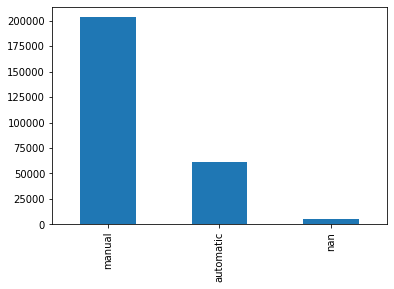

In [66]:
df2['gearbox'].value_counts(dropna = False).plot(kind = 'bar')

Imputation of the values for gearBox does not really make sense because we will not be able to determine what type of gearBox the car belongs to by using other features in the dataset. So we will drop the NA values.

In [67]:
df2 = df2[df2['gearbox'].isnull() == False]

### Statistical Analysis
Is there any discrepancy in avg price with respect to the type of gearbox.

H0 : avg_price_manual = avg_price_automatic

H1 : avg_price_manual != avg_price_automatic

In [68]:
price_manual = df2.loc[df2['gearbox'] == 'manual','price']
price_automatic = df2.loc[df2['gearbox'] == 'automatic','price']

Shapiro Test - Test for Normality

In [69]:
print(shapiro(price_manual))
print(shapiro(price_automatic))

(0.6999170780181885, 0.0)
(0.8082993030548096, 0.0)


The prices for cars with both manual and automatic gearbox are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [70]:
from scipy.stats import bartlett
print(bartlett(price_manual,price_automatic))

BartlettResult(statistic=40113.51538001386, pvalue=0.0)


The variance in price for car with automatic gearbox is not equal to the car with manual gearbox as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [71]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_manual,price_automatic))

MannwhitneyuResult(statistic=3630651119.5, pvalue=0.0)


We can see from the manwhitneyu test that the price of used car is affected by the fact that whether its an automatic or manual gearbox car as the pvalue is less than 0.05

Post hoc analysis

In [72]:
print('Avg price for car which has manual gearbox : ',price_manual.mean())
print('Avg price for car which has automatic gearbox : ',price_automatic.mean())

Avg price for car which has manual gearbox :  5181.471482141275
Avg price for car which has automatic gearbox :  11257.848026552434


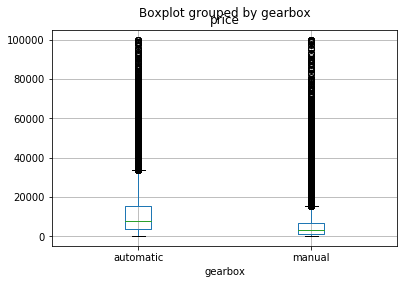

In [73]:
df2.boxplot(column='price',by = 'gearbox')

As we can see quite evidently that the average price of a used car which has an automatic gearbox is higher than that which has a manual gearbox.

### Seller

In [74]:
df2['seller'].describe()

count      264368
unique          2
top       private
freq       264366
Name: seller, dtype: object

private       264366
commercial         2
Name: seller, dtype: int64


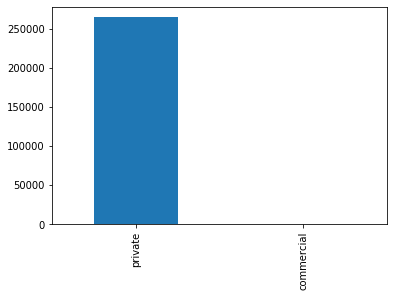

In [75]:
print(df2['seller'].value_counts(dropna = False))
df2['seller'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### OfferType

In [76]:
df2['offerType'].describe()

count     264368
unique         2
top        offer
freq      264367
Name: offerType, dtype: object

offer          264367
application         1
Name: offerType, dtype: int64


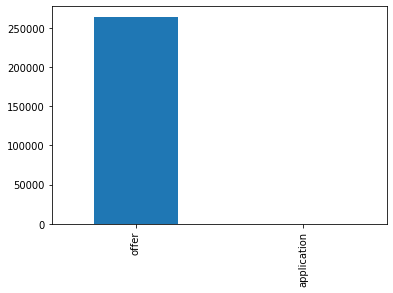

In [77]:
print(df2['offerType'].value_counts(dropna = False))
df2['offerType'].value_counts(dropna = False).plot(kind = 'bar')

The data in this features seems extremely imbalanced. So we will consider dropping this feature.

### ABTEST

In [78]:
df2['abtest'].describe()

count     264368
unique         2
top         test
freq      137172
Name: abtest, dtype: object

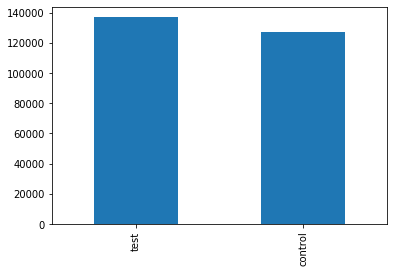

In [79]:
df2['abtest'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to abtest.

H0 : avg_price_test = avg_price_control

H1 : avg_price_test != avg_price_control

In [80]:
price_test = df2.loc[df2['abtest'] == 'test','price']
price_control = df2.loc[df2['abtest'] == 'control','price']

Shapiro Test - Test for Normality

In [81]:
print(shapiro(price_test))
print(shapiro(price_control))

(0.7027208805084229, 0.0)
(0.7039284110069275, 0.0)


The prices for cars with both test and control are not normally distributed as pvalue is less than 0.05.

Bartlett Test - Test for equal variance

In [82]:
from scipy.stats import bartlett
print(bartlett(price_test,price_control))

BartlettResult(statistic=4.13776544873579, pvalue=0.041936493185995086)


The variance in price for car with control abtest is not equal to the car with test abtest as pvalue is less that 0.05. So for a non parametric independent 2 sample t-test we will go with manwhitneyu test.

Manwhitneyu Test

H0 : Average price of car with automatic gearbox is equal to average price of car with manual gearbox.

In [83]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(price_test,price_control))

MannwhitneyuResult(statistic=8709574020.5, pvalue=0.23302577219290604)


We can see from the manwhitneyu test that the price of used car is not affected by the feature abtest as the pvalue is greater than 0.05. So we will prefer dropping this column.

### Year Of Registration

In [84]:
df2['yearOfRegistration'].describe()

count    264368.000000
mean       2003.737873
std          14.635000
min        1600.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        6200.000000
Name: yearOfRegistration, dtype: float64

In [85]:
df2.loc[(df2['yearOfRegistration']<1923) | (df2['yearOfRegistration']>2020),'yearOfRegistration'] = np.nan

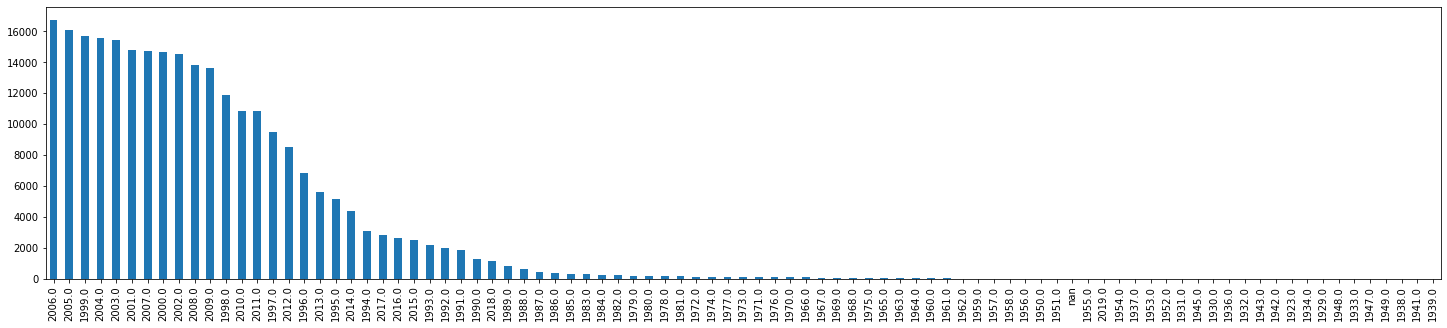

In [86]:
plt.figure(figsize=(25,5))
df2['yearOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [87]:
df2 = df2[df2['yearOfRegistration'].isnull() == False]

We will be combining this column with monthOfRegistration to convert it to the age of vehicle

### Power PS

In [88]:
df2['powerPS'].describe()

count    264360.000000
mean        125.230837
std         145.023281
min           0.000000
25%          75.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

[[0.00000000e+00]
 [5.38318884e-02]
 [1.07663777e-01]
 ...
 [1.99998923e+04]
 [1.99999462e+04]
 [2.00000000e+04]]


Text(0.5, 1.0, 'Power PS')

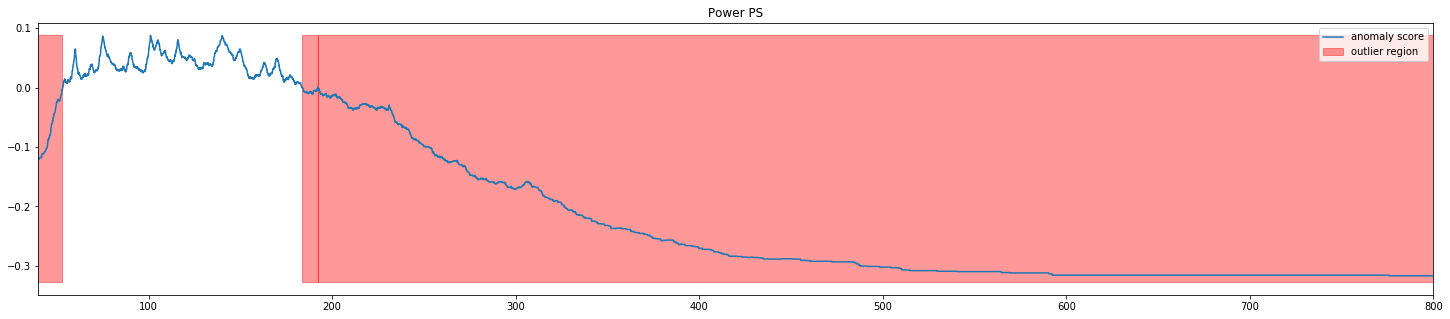

In [89]:
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df2['powerPS'].values.reshape(-1,1))

xx = np.linspace(df2['powerPS'].min(), df2['powerPS'].max(), len(df)).reshape(-1,1)
print(xx)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(25,5))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
plt.legend()
plt.xlim(40, 800)
plt.title('Power PS')

In [90]:
df2 = df2[(df2['powerPS']<800) & (df2['powerPS']>40)]

If we see from the above plot, almost all data point above 200 seems to come under outliers, but dropping all of those does not seem to be a feasible solution. We can also see that data points after 800 have consistently very low anamoly score, so we can go ahead and drop those data points, and the remaining outliers can be handled further using transformation techniques. Also data points with powerps below 40 also seem to be very low as far as powerps of a used car is concerned, so we will also drop those data points which have powerps below 40.

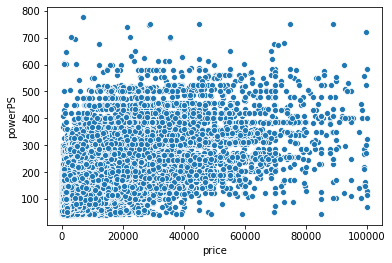

In [91]:
sns.scatterplot(x = 'price', y = 'powerPS',data = df2)

In [92]:
df2[['price','powerPS']].corr()

,price,powerPS
price,1.000000,0.593657
powerPS,0.593657,1.000000


### Brand

In [93]:
df2['brand'].describe()

count         252240
unique            39
top       volkswagen
freq           53191
Name: brand, dtype: object

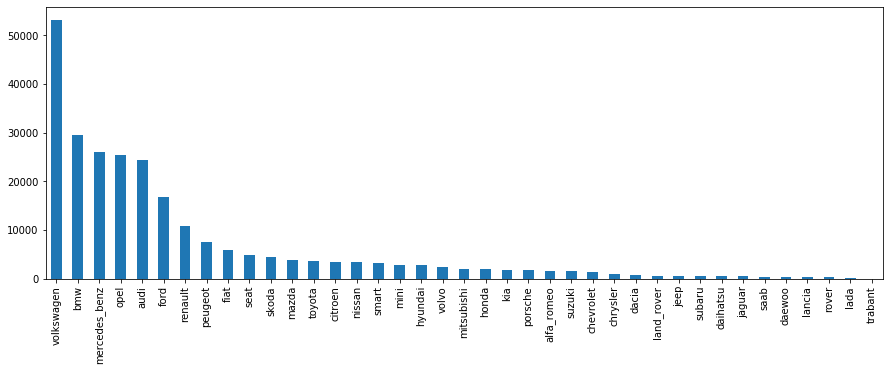

In [94]:
plt.figure(figsize=(15,5))
df2['brand'].value_counts(dropna = False).plot(kind = 'bar')

### Statistical Analysis
Is there any discrepancy in avg price with respect to brand.

H0 : avg_price_volkswagen = avg_price_bmw = avg_price_mercedes_benz = ..... = avg_price_trabant

H1 : avg_price_volkswagen != avg_price_bmw != avg_price_mercedes_benz != ..... != avg_price_trabant

In [95]:
oneway_posthoc('brand')

pvalue for brand is 0.0

Avg price of car for brand = volkswagen is  6277.39091199639
Avg price of car for brand = skoda is  7100.307398246008
Avg price of car for brand = bmw is  9337.264517001284
Avg price of car for brand = peugeot is  3727.3470712960507
Avg price of car for brand = mazda is  4740.099055399541
Avg price of car for brand = nissan is  5532.621230041395
Avg price of car for brand = renault is  2935.469828770259
Avg price of car for brand = ford is  4366.649871496025
Avg price of car for brand = mercedes_benz is  9290.032085149049
Avg price of car for brand = opel is  3523.2859626249456
Avg price of car for brand = seat is  5216.342880193626
Avg price of car for brand = honda is  4554.605345911949
Avg price of car for brand = fiat is  3411.8916850875703
Avg price of car for brand = mini is  10379.326594632275
Avg price of car for brand = smart is  4060.2968847352026
Avg price of car for brand = audi is  10189.823546332444
Avg price of car for brand = alfa_romeo is  4768

We can see from the oneway test that the price of used car is affected by brand as the pvalue is less than 0.05

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text xticklabel objects>)

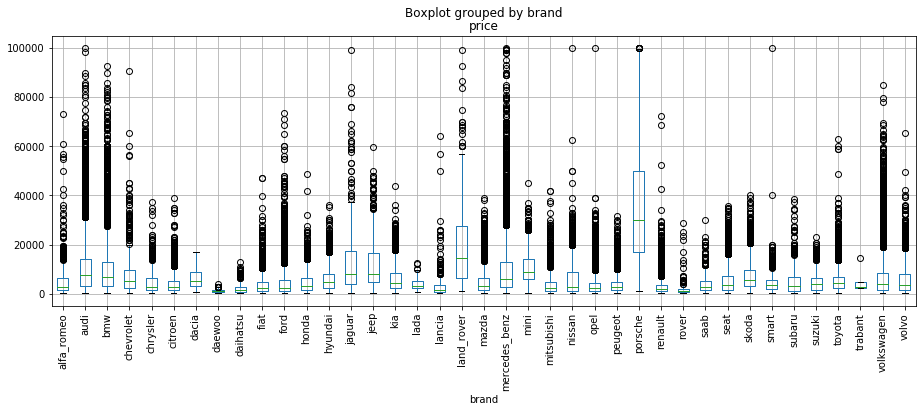

In [96]:
df2.boxplot(column='price',by = 'brand',figsize = (15,5))
plt.xticks(rotation = 90)

As we can see quite evidently that the average price of a used car varies significantly for different brands of vehicles.

### Month Of Registration

In [97]:
df2['monthOfRegistration'].describe()

count    252240.000000
mean          6.200182
std           3.458851
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

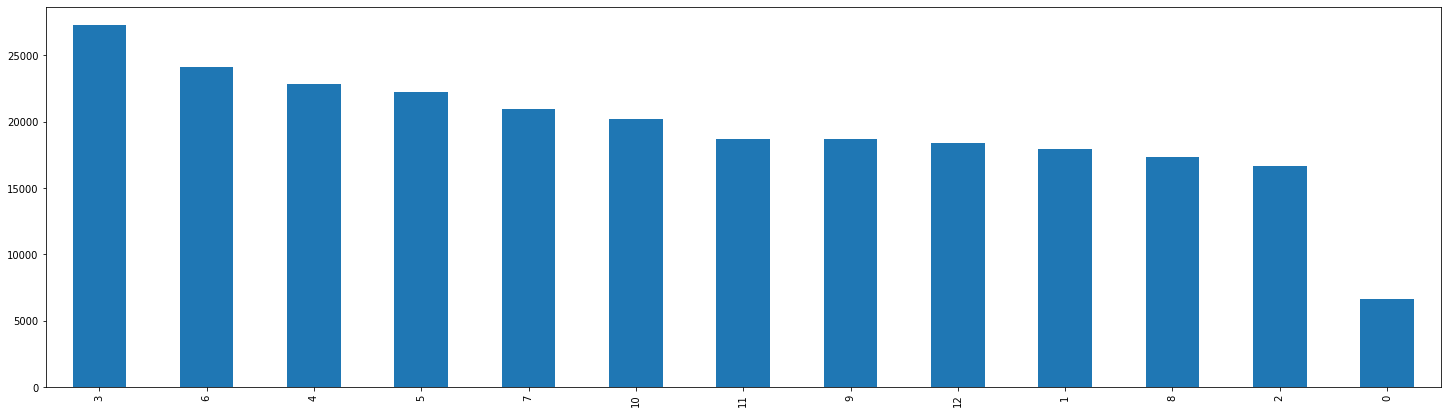

In [98]:
plt.figure(figsize=(25,7))
df2['monthOfRegistration'].value_counts(dropna = False).plot(kind = 'bar')

In [99]:
df2 = df2[df2['monthOfRegistration'] != 0]

We will be combining this column with yearOfRegistration to convert it to the age of vehicle

### Number of days online

In [100]:
val = list(df2['lastSeen'] - df2['dateCreated'])
days = [obj.days for obj in val]
for i in range(len(days)):
  if days[i] < 0:
    days[i] = np.nan
df2['No_of_days_online'] = days

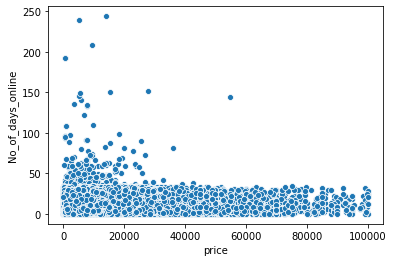

In [101]:
sns.scatterplot(x = 'price', y = 'No_of_days_online',data = df2)

In [102]:
df2[['price','No_of_days_online']].corr()

,price,No_of_days_online
price,1.000000,0.130071
No_of_days_online,0.130071,1.000000


### Age of Vehicle

In [103]:
import datetime

def calculateAge(yr,mnth):
    today_date = datetime.datetime.today()
    years = today_date.year - yr
    month = today_date.month - mnth
    ageindecimal = years + month/12
    return round(ageindecimal,2)

In [104]:
df2['ageOfVehicle'] = list(map(calculateAge,df2['yearOfRegistration'],df2['monthOfRegistration']))

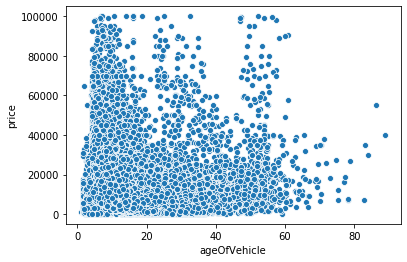

In [105]:
sns.scatterplot(y = 'price', x = 'ageOfVehicle',data = df2)

In [106]:
df2[['price','ageOfVehicle']].corr()

,price,ageOfVehicle
price,1.000000,-0.447432
ageOfVehicle,-0.447432,1.000000


## Finalizing features depending on EDA

In [107]:
df3 = df2[['kilometer','notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'ageOfVehicle', 'model', 'brand', 'powerPS', 'No_of_days_online', 'price']]

In [108]:
df3.head()

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,price
3,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0,1500
4,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,6,3600
5,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,2,650
6,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,4,2200
10,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,11,2000


In [109]:
get_missing_val_count_df(df3)

,count
vehicleType,4607
kilometer,0
notRepairedDamage,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0
No_of_days_online,0


## Imputation of vehicle type

In [110]:
# cat_cols = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox', 'model', 'brand']
cat_cols = ['vehicleType', 'model', 'brand']

Using model, brand and price to impute missing values of vehicle type.

In [111]:
from sklearn.preprocessing import OrdinalEncoder
# Create dictionary for Ordinal encoders
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in cat_cols:
  # Create ordinal encoder for the column
  ordinal_enc_dict[col_name] = OrdinalEncoder()
  # Select the nin-null values in the column
  col = df3[col_name]
  col_not_null = col[col.notnull()]
  reshaped_vals = col_not_null.values.reshape(-1, 1)
  # Encode the non-null values of the column
  encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
  # Replace the ambience column with ordinal values
  df3.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [112]:
from sklearn.impute import KNNImputer
KNN_imputer = KNNImputer(n_neighbors=20)
df3_KNN = df3[['vehicleType', 'model', 'brand','price']].copy(deep=True)
df3_KNN.iloc[:, :] = np.round(KNN_imputer.fit_transform(df3_KNN))

In [113]:
for col in cat_cols:
    reshaped_col = df3_KNN[col].values.reshape(-1, 1)
    df3_KNN[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [114]:
df_final = df3.copy(deep=True)

In [115]:
df_final.loc[:,cat_cols] = df3_KNN[cat_cols]

In [116]:
df_final.reset_index(drop=True)

,kilometer,notRepairedDamage,vehicleType,fuelType,gearbox,ageOfVehicle,model,brand,powerPS,No_of_days_online,price
0,150000,No,small car,petrol,manual,19.00,golf,volkswagen,75,0,1500
1,90000,No,small car,diesel,manual,11.92,fabia,skoda,69,6,3600
2,150000,Yes,limousine,petrol,manual,24.67,3s,bmw,102,2,650
3,150000,No,convertible,petrol,manual,15.83,2series,peugeot,109,4,2200
4,150000,No,limousine,petrol,manual,15.50,3series,mazda,105,11,2000
...,...,...,...,...,...,...,...,...,...,...,...
245608,150000,No,limousine,diesel,manual,9.92,golf,volkswagen,140,5,7900
245609,150000,Yes,limousine,petrol,manual,16.08,leon,seat,225,0,3200
245610,125000,No,convertible,petrol,automatic,20.25,fortwo,smart,101,6,1199
245611,150000,No,bus,diesel,manual,24.25,transporter,volkswagen,102,19,9200


In [117]:
get_missing_val_count_df(df_final)

,count
kilometer,0
notRepairedDamage,0
vehicleType,0
fuelType,0
gearbox,0
ageOfVehicle,0
model,0
brand,0
powerPS,0
No_of_days_online,0
